# Recommendation Engines: Implementing Surprise
- Surprise is a scikit library that stands for **Simple Python RecommendatIon System Engine**
- Has built-in similarity metrics, baseline methods, content-based systems, matrix factorization systems

In this notebook, we'll first walk through setting up a super basic recommendation system, using the popular MovieLens 100K Dataset. Then, we'll look into more detail how Surprise works.

## Fitting and Predicting with Surprise

### 1. Install surprise if you haven't, and import the usual libraries.

In [4]:
conda install -c conda-forge scikit-surprise

Solving environment: done

## Package Plan ##

  environment location: /Users/fabricemesidor/anaconda3

  added / updated specs:
    - scikit-surprise


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.9.11  |       hecc5488_0         143 KB  conda-forge
    certifi-2019.9.11          |           py37_0         147 KB  conda-forge
    conda-4.7.12               |           py37_0         3.0 MB  conda-forge
    scikit-surprise-1.1.0      |py37heacc8b8_1001         597 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.9 MB

The following NEW packages will be INSTALLED:

  scikit-surprise    conda-forge/osx-64::scikit-surprise-1.1.0-py37heacc8b8_1001

The following packages will be UPDATED:

  ca-certificates     anaconda::ca-certificates-2019.5.15-1 --> conda-forge::ca-certificat

In [28]:
!pip install scikit-image

     |████████████████████████████████| 30.0MB 3.9MB/s eta 0:00:01
     |████████████████████████████████| 3.3MB 705kB/s eta 0:00:01
     |████████████████████████████████| 5.0MB 756kB/s eta 0:00:01
     |████████████████████████████████| 1.8MB 8.3MB/s eta 0:00:01
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556409 sha256=6170b1267f027d2a062dbdff1a680db331215c623405a0ea8b69560629747c1b
  Stored in directory: /Users/fabricemesidor/Library/Caches/pip/wheels/de/63/64/3699be2a9d0ccdb37c7f16329acf3863fd76eda58c39c737af
Successfully built networkx


In [5]:
!pip install surprise

  Using cached https://files.pythonhosted.org/packages/61/de/e5cba8682201fcf9c3719a6fdda95693468ed061945493dea2dd37c5618b/surprise-0.1-py2.py3-none-any.whl


In [6]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from surprise import Dataset, Reader
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import cross_validate, train_test_split

### 2. Load in the dataset

Surprise has the dataset built in. You might need to download the dataset so follow the instructions in the code output! Unfortunately, the Surprise data format doesn't let us inspect the data, but here is the documentation: https://grouplens.org/datasets/movielens/100k/


In [7]:
data = Dataset.load_builtin('ml-100k')

# train-test split
train, test = train_test_split(data, test_size=.2)

Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /Users/fabricemesidor/.surprise_data/ml-100k


In [8]:
train

### 3. Run the default Singular Value Decomposition Model!

In [9]:
svd = SVD()
svd.fit(train)
predictions = svd.test(test)

In [10]:
accuracy.rmse(predictions)

RMSE: 0.9353


0.9352721890901369

### 4. Make a prediction!

In [11]:
uid = str(196)  # raw user id (as in the ratings file). They are **strings**!
iid = str(302)

# get a prediction for specific users and items.
pred = svd.predict(uid, iid, r_ui=4, verbose=True)

user: 196        item: 302        r_ui = 4.00   est = 4.19   {'was_impossible': False}


In [15]:
predictions[:5]

[Prediction(uid='919', iid='243', r_ui=3.0, est=2.2841685011409343, details={'was_impossible': False}),
 Prediction(uid='95', iid='392', r_ui=3.0, est=3.54034255026012, details={'was_impossible': False}),
 Prediction(uid='487', iid='399', r_ui=5.0, est=3.380059032891244, details={'was_impossible': False}),
 Prediction(uid='846', iid='177', r_ui=3.0, est=4.265953250192373, details={'was_impossible': False}),
 Prediction(uid='270', iid='93', r_ui=5.0, est=4.366370283088892, details={'was_impossible': False})]

## Applying Surprise

### 1. How does Surprise take in your data?
https://surprise.readthedocs.io/en/stable/getting_started.html#use-a-custom-dataset

The dataset we'll use is a subset of the Yelp Open Dataset that's already been joined and cleaned.
https://www.yelp.com/dataset

In [16]:
yelp = pd.read_csv('yelp_reviews.csv').drop(['Unnamed: 0'], axis = 1)

In [17]:
yelp.head()

,user_id,business_id,stars
0,brd33PD_6nqK_VVnO3NWAg,--1UhMGODdWsrMastO9DZw,4.0
1,NqpKiaRsGfuU2voV5dPRCQ,--1UhMGODdWsrMastO9DZw,1.0
2,dhzlnpisqA7V1zfiO12AZA,--1UhMGODdWsrMastO9DZw,2.0
3,A4bpHuvzaQt9-XAg8e9Msw,--1UhMGODdWsrMastO9DZw,3.0
4,GL81ktDIteXA2VVH6gIakg,--1UhMGODdWsrMastO9DZw,5.0


### 2. Inspecting the dataset:

Here's where you'd do a **comprehensive** EDA!

In [18]:
print('Number of Users: ', len(yelp['user_id'].unique()))
print('Number of Businesses: ', len(yelp['business_id'].unique()))

Number of Users:  79773
Number of Businesses:  2518


1. What's the distribution of ratings? i.e. How many 1-star, 2-star, 3-star reviews?
2. How many reviews does a restaurant have?
3. How many reviews does a user make?

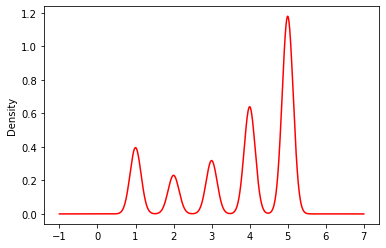

In [27]:
yelp.stars.plot(kind='kde',c='r')

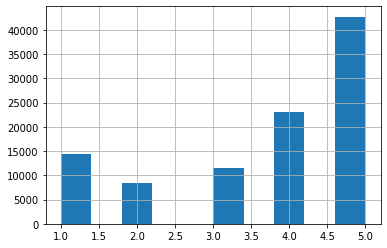

In [25]:
yelp.stars.hist()

In [28]:
yelp['stars'].value_counts()

5.0    42685
4.0    23143
1.0    14315
3.0    11522
2.0     8335
Name: stars, dtype: int64

In [29]:
yelp['business_id'].value_counts()

-ed0Yc9on37RoIoG2ZgxBA    1694
--9e1ONYQuAa-CB_Rrw7Tw    1661
-6tvduBzjLI1ISfs3F_qTg    1194
-U7tvCtaraTQ9b0zBhpBMA    1180
-FLnsWAa4AGEW4NgE8Fqew    1128
                          ... 
-6kNwcnLbsyKGIjFlxMD2g       3
-R_u_4Ya8ceUN7qDlvIQTg       3
-g4CC11SsaLYeQ5mjRxSfw       3
-o8NmDhLfUeBNCABxf6rQQ       3
-OHcd6mJL90wiQYE1e3gGg       3
Name: business_id, Length: 2518, dtype: int64

### 3. Reading in the dataset and prepping data

In [30]:
# Instantiate a 'Reader' to read in the data so Surprise can use it
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(yelp[['user_id', 'business_id', 'stars']], reader)

In [31]:
trainset, testset = train_test_split(data, test_size=.2)

In [32]:
trainset

### 4. Fitting and evaluating models
Here, let's assume that we've tuned all these hyperparameters using GridSearch, and we've arrived at our final model.

In [33]:
final = SVD(n_epochs=20, n_factors=1, biased=True, 
              lr_all=0.005, reg_all=0.06)

In [34]:
final.fit(trainset)

In [35]:
predictions = final.test(testset)

In [36]:
predictions[:3]

[Prediction(uid='Z3nwYQzDUimoUl8LNDIxjQ', iid='-3K14kIKBH3gBOLf8-XFsg', r_ui=5.0, est=4.3475151505082845, details={'was_impossible': False}),
 Prediction(uid='LMfYgsc76My5nLOwVDNMLw', iid='-gRkfQ7CGqz0V3Y1wPeB2w', r_ui=5.0, est=4.031989333832196, details={'was_impossible': False}),
 Prediction(uid='9OA2XO1ecCjBH4g8kQMRyg', iid='-Eu04UHRqmGGyvYRDY8-tg', r_ui=5.0, est=4.576592735839215, details={'was_impossible': False})]

In [37]:
accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 1.2954
MAE:  1.0548


1.0547625124046602

### 5. Making Predictions (again)
Unfortunately, this dataset has a convoluted string as the user/business IDs.

In [38]:
yelp['user_id'][55]

'HPtjvIrhzAUkKsiVkeT4MA'

In [39]:
yelp['business_id'][123]

'--7zmmkVg-IMGaXbuVd0SQ'

In [40]:
final.predict(yelp['user_id'][55], yelp['business_id'][13])

Prediction(uid='HPtjvIrhzAUkKsiVkeT4MA', iid='--1UhMGODdWsrMastO9DZw', r_ui=None, est=3.760676640066666, details={'was_impossible': False})

### 6. What else?

Surprise has sample code where you can get the top **n** recommended items for a user. https://surprise.readthedocs.io/en/stable/FAQ.html

# Resources

- The structure of our lesson on recommendation engines is based on Chapter 9 of **Mining of Massive Datasets**: http://infolab.stanford.edu/~ullman/mmds/book.pdf
- Libraries for coding recommendation engines: 
    - Surprise: https://surprise.readthedocs.io/en/stable/index.html
    - LightFM: https://lyst.github.io/lightfm/docs/index.html
    
    
- Some blogs I might've written:
    - Overview: https://towardsdatascience.com/a-primer-to-recommendation-engines-49bd12ed849f?source=friends_link&sk=279dfeec5187614b37431dab167fd4e3
    - Collaborative filtering: https://towardsdatascience.com/a-primer-to-recommendation-engines-49bd12ed849f?source=friends_link&sk=279dfeec5187614b37431dab167fd4e3